Machine Learning Project : Regression Analysis

In [40]:
# Import time
import time

# Import Data Manipulation libraries
import numpy as np
import pandas as pd

# Import Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import filter warnings libraries
import warnings
warnings.filterwarnings('ignore')

#Import logging libraries
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'model.log',
                    force = True)

# Import the scikit-learn libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [41]:
# Step 2: Import dataset

data = pd.DataFrame({
    'feature1': np.random.randint(0, 10000, 1000),
    'feature2': np.random.randint(0, 30, 1000),
    'feature3': np.random.randint(20, 10000, 1000),
    'target': np.random.randint(0, 100, 1000)
})

In [42]:
# Steo 3: Checking dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  1000 non-null   int64
 1   feature2  1000 non-null   int64
 2   feature3  1000 non-null   int64
 3   target    1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


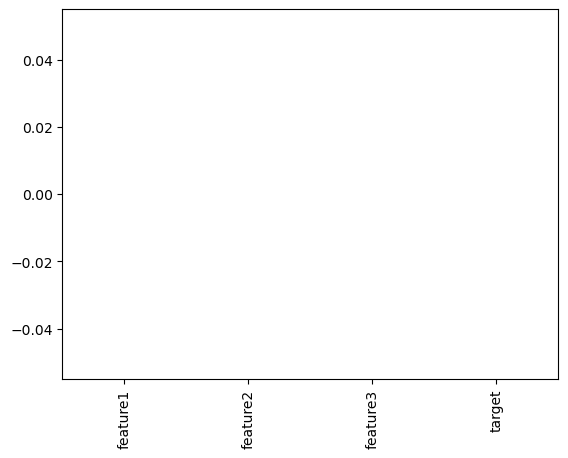

In [43]:
# Step 4: Checking null values in dataset
data.isnull().sum().plot(kind = 'bar')
plt.show()


In [44]:
# Step 4: EDA

from collections import OrderedDict

stats = []

for i in data.columns:
    numerical_stats = OrderedDict({
        'feature': i,
        'mean': data[i].mean(),
        'median': data[i].median(),
        'min': data[i].min(),
        'max': data[i].max(),
        'range': data[i].max() - data[i].min(),
        'Q1': data[i].quantile(0.25),
        'Q3': data[i].quantile(0.75),
        'IQR': data[i].quantile(0.75) - data[i].quantile(0.25),
        'Skewness': data[i].skew(),
        'Kurtosis': data[i].kurt()
        })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
report

,feature,mean,median,min,max,range,Q1,Q3,IQR,Skewness,Kurtosis
0,feature1,5011.483,5055.0,2,9971,9969,2426.25,7574.75,5148.5,-0.023845,-1.212333
1,feature2,14.369,15.0,0,29,29,7.00,22.00,15.0,0.001666,-1.248622
2,feature3,5029.785,4980.0,51,9970,9919,2544.00,7461.50,4917.5,-0.020246,-1.203645
3,target,49.905,51.0,0,99,99,26.00,75.00,49.0,-0.032236,-1.183311


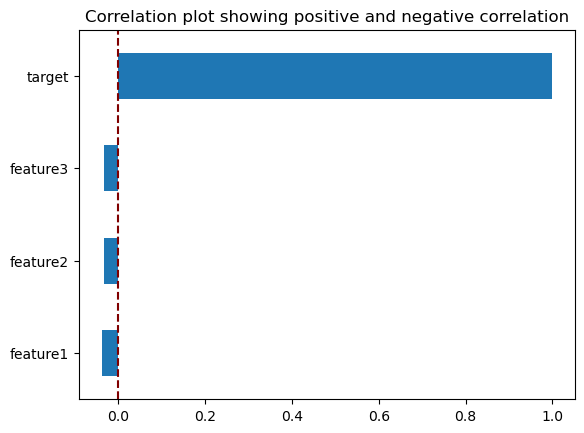

In [45]:
# Checking the correlation of feature w.r.t target column

data.corr()['target'].plot(kind = 'barh')
plt.axvline(0, linestyle = '--', color = 'maroon')
plt.title('Correlation plot showing positive and negative correlation')
plt.show()

In [47]:
start = time.time()

In [48]:
end = time.time()

In [54]:
time = end - start
logging.info(f'Time taken : {time} seconds')
time

9.883334159851074